<a href="https://colab.research.google.com/github/Hwarriach/Seol_Bike_Linear_Regression_Project/blob/main/Seol_Bike_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **LOADING LIBRARIES**

In [ ]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style='white', color_codes=True)

from sklearn import preprocessing

# **Data Acquistion and Exploration**

In [ ]:
bike = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Linear Regression/Seol Bike Project/SeoulBikeData.csv")

In [ ]:
#Printing Dimension of dataset
print("Dimension of train dataset", bike.shape)

Dimension of train dataset (8760, 14)


In [ ]:
# Showing overview of the bike dataset

bike.head()

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      8760 non-null   object 
 1   Rented Bike Count         8760 non-null   int64  
 2   Hour                      8760 non-null   int64  
 3   Temperature(C)            8760 non-null   float64
 4   Humidity(%)               8760 non-null   int64  
 5   Wind speed (m/s)          8760 non-null   float64
 6   Visibility (10m)          8760 non-null   int64  
 7   Dew point temperature(C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)   8760 non-null   float64
 9   Rainfall(mm)              8760 non-null   float64
 10  Snowfall (cm)             8760 non-null   float64
 11  Seasons                   8760 non-null   object 
 12  Holiday                   8760 non-null   object 
 13  Functioning Day           8760 non-null   object 
dtypes: float

In [ ]:
# Transforming "object" data type to numerical values in order to use in our model

label_encoder = preprocessing.LabelEncoder()
bike['Holiday'] = label_encoder.fit_transform(bike['Holiday'])
bike['Seasons'] = label_encoder.fit_transform(bike['Seasons'])
bike['Functioning Day'] = label_encoder.fit_transform(bike['Functioning Day'])

bike.head()

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,3,1,1
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,3,1,1
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,3,1,1
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,3,1,1
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,3,1,1


In [ ]:
bike['Holiday'].value_counts()

1    8328
0     432
Name: Holiday, dtype: int64

In [ ]:
bike['Seasons'].value_counts()

1    2208
2    2208
0    2184
3    2160
Name: Seasons, dtype: int64

In [ ]:
bike['Functioning Day'].value_counts()

1    8465
0     295
Name: Functioning Day, dtype: int64

In [ ]:
# Extracting dataframe for only 'number' datatypes

df = bike.select_dtypes(include = ['float64','int64'])

df.head()

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,3,1,1
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,3,1,1
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,3,1,1
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,3,1,1
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,3,1,1


In [ ]:
# Showing datatypes of the columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Rented Bike Count         8760 non-null   int64  
 1   Hour                      8760 non-null   int64  
 2   Temperature(C)            8760 non-null   float64
 3   Humidity(%)               8760 non-null   int64  
 4   Wind speed (m/s)          8760 non-null   float64
 5   Visibility (10m)          8760 non-null   int64  
 6   Dew point temperature(C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)   8760 non-null   float64
 8   Rainfall(mm)              8760 non-null   float64
 9   Snowfall (cm)             8760 non-null   float64
 10  Seasons                   8760 non-null   int64  
 11  Holiday                   8760 non-null   int64  
 12  Functioning Day           8760 non-null   int64  
dtypes: float64(6), int64(7)
memory usage: 889.8 KB


In [ ]:
# getting discriptive statistcs on "number" datatypes

df.describe()

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,1.495890,0.950685,0.966324
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,1.114408,0.216537,0.180404
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,1.000000,1.000000,1.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,2.000000,1.000000,1.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000,3.000000,1.000000,1.000000


In [ ]:
#Identifing missing Values

miss_val = df.isna().sum()
miss_val

Rented Bike Count           0
Hour                        0
Temperature(C)              0
Humidity(%)                 0
Wind speed (m/s)            0
Visibility (10m)            0
Dew point temperature(C)    0
Solar Radiation (MJ/m2)     0
Rainfall(mm)                0
Snowfall (cm)               0
Seasons                     0
Holiday                     0
Functioning Day             0
dtype: int64

In [ ]:
# Finding Outliers using BOX PLOT

def plot_box(col):
  plt.figure(figsize = (5,5))
  sns.boxplot(df[col])
  plt.show()

def remove_outliers(df,col):
  q1, q2, q3 = np.percentile(df[col],[25,50,75])
  IntQuartRange = q3 - q1
  df = df[df[col] > (q1 - (IntQuartRange * 1.5))]
  df = df[df[col] < (q3 + (IntQuartRange * 1.5))]

  return df

In [ ]:
# Code used to create a plot box for all of the columns at once to identify outliers
#Currently texted out.

# for col in list(df.columns):
#   plot_box(col)

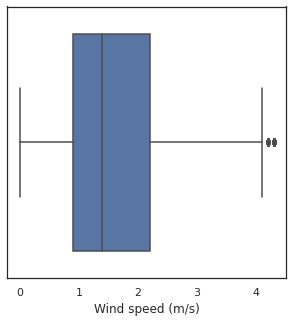

In [ ]:
# Column with largrest outlier

plot_box("Wind speed (m/s)")

In [ ]:
# Removing outliers from "Wind speed (m/s) column"

df = remove_outliers(df,'Wind speed (m/s)')

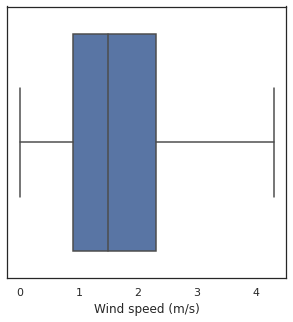

In [ ]:
plot_box("Wind speed (m/s)")

# **CORRELATION**

In [ ]:
#Constructing correlation Matrix

data_corr = bike.corr()
data_corr

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
Rented Bike Count,1.000000,4.102573e-01,0.538558,-0.199780,0.121108,0.199280,0.379788,0.261837,-0.123074,-0.141804,-2.530575e-01,7.233757e-02,0.203943
Hour,0.410257,1.000000e+00,0.124114,-0.241644,0.285197,0.098753,0.003054,0.145131,0.008715,-0.021516,-1.747965e-15,1.289087e-16,0.005439
Temperature(C),0.538558,1.241145e-01,1.000000,0.159371,-0.036252,0.034794,0.912798,0.353505,0.050282,-0.218405,-3.352067e-01,5.593084e-02,-0.050170
Humidity(%),-0.199780,-2.416438e-01,0.159371,1.000000,-0.336683,-0.543090,0.536894,-0.461919,0.236397,0.108183,-1.203104e-01,5.027765e-02,-0.020800
Wind speed (m/s),0.121108,2.851967e-01,-0.036252,-0.336683,1.000000,0.171507,-0.176486,0.332274,-0.019674,-0.003554,1.089520e-01,-2.301677e-02,0.005037
Visibility (10m),0.199280,9.875348e-02,0.034794,-0.543090,0.171507,1.000000,-0.176630,0.149738,-0.167629,-0.121695,-1.477622e-02,-3.177281e-02,-0.026000
Dew point temperature(C),0.379788,3.054372e-03,0.912798,0.536894,-0.176486,-0.176630,1.000000,0.094381,0.125597,-0.150887,-3.290270e-01,6.675910e-02,-0.052837
Solar Radiation (MJ/m2),0.261837,1.451309e-01,0.353505,-0.461919,0.332274,0.149738,0.094381,1.000000,-0.074290,-0.072301,-7.581168e-02,5.077255e-03,-0.007665
Rainfall(mm),-0.123074,8.714642e-03,0.050282,0.236397,-0.019674,-0.167629,0.125597,-0.074290,1.000000,0.008500,-1.929617e-02,1.426911e-02,0.002055
Snowfall (cm),-0.141804,-2.151645e-02,-0.218405,0.108183,-0.003554,-0.121695,-0.150887,-0.072301,0.008500,1.000000,1.454573e-01,1.259072e-02,0.032089


In [ ]:
#Considering only the features which have absolute correlation values greater than 0.15

data_corr = data_corr['Rented Bike Count'][:-1]
data_corr[abs(data_corr)>=0.15].sort_values(ascending=False)

Rented Bike Count           1.000000
Temperature(C)              0.538558
Hour                        0.410257
Dew point temperature(C)    0.379788
Solar Radiation (MJ/m2)     0.261837
Visibility (10m)            0.199280
Humidity(%)                -0.199780
Seasons                    -0.253058
Name: Rented Bike Count, dtype: float64

In [ ]:
df_bike = df[['Rented Bike Count','Hour','Temperature(C)', 'Wind speed (m/s)', 'Seasons', 'Rainfall(mm)', 'Snowfall (cm)', 'Functioning Day', 'Holiday', 'Dew point temperature(C)', 'Solar Radiation (MJ/m2)', 'Visibility (10m)'  ]]

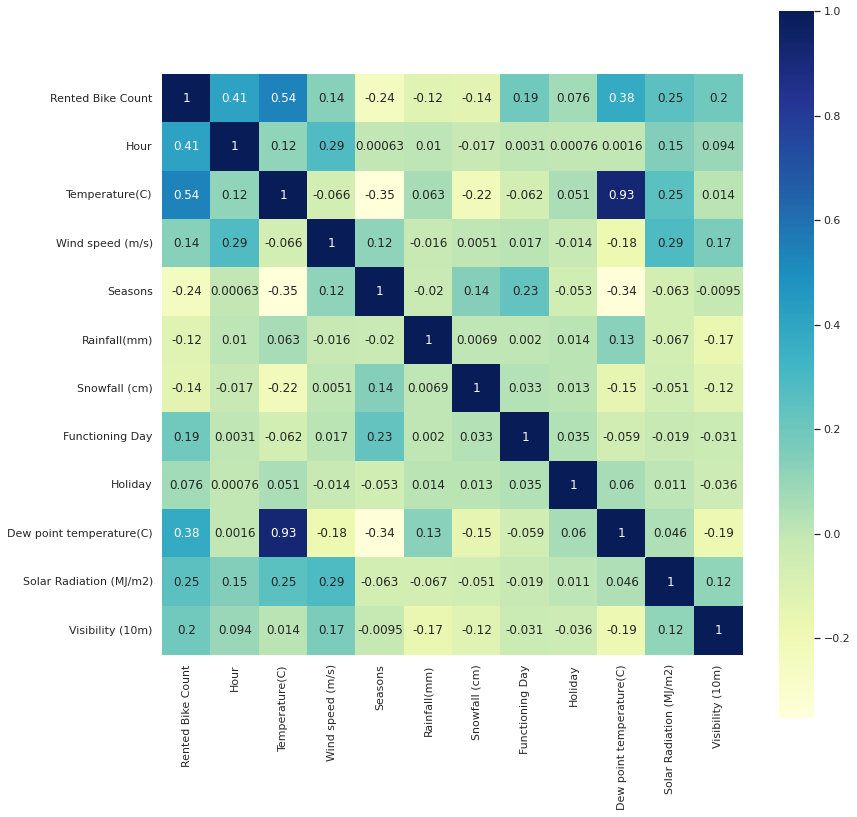

In [ ]:
corr = df_bike.corr()
plt.figure(figsize=(13,13))
sns.heatmap(corr, annot=True, cmap='YlGnBu',square=True) 
plt.show()

*   Strongest positive correlations: Hour (0.41) & Temerature (0.54)
*   Strongest negative correlations (reduce Rented Bike Count): Seasons (-0.24) & Snowfall (-0.14)



Selecting independent and dependent variables

In [ ]:
from sklearn.model_selection import train_test_split
train, val = train_test_split(df_bike, test_size=0.25)

In [ ]:
#considering only the highly correlated features for training and validation

train_x = train.drop(['Rented Bike Count'], axis = 1)
train_y = train['Rented Bike Count']             # output of the training data

val_x = val.drop(['Rented Bike Count'], axis = 1)
val_y = val['Rented Bike Count'] 

In [ ]:
print('Dimension of train_x dataframe:',train_x.shape)
print('Dimension of train_y dataframe:',train_y.shape)
print('Dimension of val_x dataframe:',val_x.shape)
print('Dimension of val_y dataframe:',val_y.shape)

Dimension of train_x dataframe: (5931, 11)
Dimension of train_y dataframe: (5931,)
Dimension of val_x dataframe: (1977, 11)
Dimension of val_y dataframe: (1977,)


# **LINEAR REGRESSION**

In [ ]:
from sklearn.linear_model import LinearRegression

ln_reg = LinearRegression()
ln_reg.fit(train_x, train_y)

LinearRegression()

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

df_pred = ln_reg.predict(val_x)
print('Mean Absolute Error of linear regression:',mean_absolute_error(val_y,df_pred))
print('Mean Square Error of linear regression:', mean_squared_error(val_y,df_pred))
print('R_Squared Score of linear regression:', r2_score(val_y,df_pred))

Mean Absolute Error of linear regression: 336.0980479794555
Mean Square Error of linear regression: 194987.89100231518
R_Squared Score of linear regression: 0.5578330616580853


# **REGULARIZATION**


Ridge

In [ ]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge

Ridge()

In [ ]:
ridge.fit(train_x,train_y)
ridge_score = ridge.score(val_x,val_y)
coeff_used = np.sum(ridge.coef_ != 0)
ridge.coef_

array([ 2.67325001e+01,  5.36420579e+01,  3.33782404e+01, -9.71192762e+01,
       -6.94226807e+01,  2.45199638e+01,  9.27372664e+02,  1.07397510e+02,
       -2.63740345e+01, -9.01757188e+01,  3.53815647e-02])

In [ ]:
print("training score",ridge_score)
print("number of feature used:",coeff_used)

training score 0.5517807177004055
number of feature used: 11


Lasso

In [ ]:
from sklearn.linear_model import Lasso 
lasso = Lasso()
lasso

Lasso()

In [ ]:
lasso.fit(train_x,train_y)
lasso_score = lasso.score(val_x,val_y)
coeff_used = np.sum(lasso.coef_ != 0)
lasso.coef_

array([ 2.68345635e+01,  5.30537341e+01,  3.13450307e+01, -9.49185955e+01,
       -6.84970600e+01,  1.77513946e+01,  9.00649563e+02,  8.73607036e+01,
       -2.59029405e+01, -8.61318271e+01,  3.64573991e-02])

In [ ]:
print("training score",lasso_score)
print("number of feature used:",coeff_used)

training score 0.5517063405546163
number of feature used: 11
